# Cyber Defense Dataset (CSE-CIC-IDS2018) Analysis


A Realistic Cyber Defense Dataset (CSE-CIC-IDS2018) was accessed on 2024-06-18 from https://registry.opendata.aws/cse-cic-ids2018.

### 1.0 Set-up

In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
pd.set_option("display.max_columns", None)  # or 1000
pd.set_option("display.max_rows", None)  # or 1000

In [5]:
!aws s3 ls --no-sign-request s3://cse-cic-ids2018/

                           PRE Original Network Traffic and Log data/
                           PRE Processed Traffic Data for ML Algorithms/


In [6]:
import subprocess
output = subprocess.check_output('aws s3 ls --no-sign-request "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/"', shell=True).decode('utf-8')

# Split the output by newline character
lines = output.split('\n')

# Iterate over each line and print the file size in GB
for line in lines:
    if line:
        file_info = line.split()
        if len(file_info) >= 4:  # Check if file_info has at least 4 elements
            file_size = int(file_info[2])
            file_size_gb = file_size / (1024**3)  # Convert bytes to GB
            print(f"File: {file_info[3]}, Size: {file_size_gb:.2f} GB")


File: Friday-02-03-2018_TrafficForML_CICFlowMeter.csv, Size: 0.33 GB
File: Friday-16-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.31 GB
File: Friday-23-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.36 GB
File: Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv, Size: 3.78 GB
File: Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv, Size: 0.10 GB
File: Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.35 GB
File: Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.36 GB
File: Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.33 GB
File: Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.31 GB
File: Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv, Size: 0.19 GB


In [7]:
import io
import boto3
from botocore.config import Config
from botocore import UNSIGNED


client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
cyber_bucket = 'cse-cic-ids2018'
cyber_prefix = f'Processed Traffic Data for ML Algorithms'

obj = client.get_object(Bucket= cyber_bucket , Key = cyber_prefix + '/' + 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
df = pd.read_csv(io.BytesIO(obj['Body'].read()), encoding='utf8')

df.to_csv('Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv', index=False)


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')

In [ ]:
%pip install pyarrow
%pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 3.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.8/683.8 kB 9.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# convert csv to parquet
df.to_parquet('Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet', index=False)

In [12]:
# read 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet' parquet file via df

df = pd.read_parquet('Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet')

### 2.0 Data analysis

#### 2.1 Data exploration

In [13]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,56321077,56320081,112641158,5.632058e+07,7.042784e+02,56321077,56320081,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,154.857143,254.855270,976,0,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,15617415,7,37366762,2.874366e+06,5.104444e+06,15617415,40,37366730,3.396975e+06,5.564224e+06,15936762,893,0,0,0,0,456,416,0.374665,0.321141,0,976,191.148148,320.122898,102478.669516,0,0,0,1,0,0,0,0,0,198.5,154.857143,249.416667,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,32.000000,45.254834,0,0,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,543,543,543,5.430000e+02,0.000000e+00,543,543,0,0.000000e+00,0.000000e+00,0,0,1,0,0,0,64,0,3683.241252,0.000000,0,64,42.666667,36.950417,1365.333333,0,1,0,0,1,0,0,0,0,64.0,32.000000,0.000000,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,56320611,56320092,112640703,5.632035e+07,3.669884e+02,56320611,56320092,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,56320946,56319928,112640874,5.632044e+07,7.198347e+02,56320946,56319928,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [14]:
df.shape

(1048575, 80)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [16]:
# show number of unique values
df.nunique().sort_values(ascending=False)

Flow Byts/s          542155
Flow Pkts/s          501270
Flow IAT Mean        501083
Fwd Pkts/s           498247
Flow Duration        483970
Flow IAT Std         464613
Fwd IAT Mean         444703
Fwd IAT Tot          434593
Bwd Pkts/s           415147
Flow IAT Max         392002
Fwd IAT Max          377347
Fwd IAT Std          353644
Bwd IAT Mean         335604
Bwd IAT Tot          329725
Bwd IAT Std          325005
Bwd IAT Max          262596
Idle Mean            153947
Fwd IAT Min          148883
Idle Min             134473
Idle Max             125263
Bwd IAT Min          124886
Active Mean          123378
Active Max           118060
Flow IAT Min         116630
Idle Std              99359
Active Std            93199
Pkt Len Var           72103
Pkt Len Std           71873
Active Min            67836
Pkt Len Mean          56964
Pkt Size Avg          56423
Fwd Pkt Len Std       46964
Bwd Pkt Len Std       46792
Bwd Pkt Len Mean      38049
Bwd Seg Size Avg      38048
Timestamp           

In [17]:
# show missing values
df.isnull().sum().sort_values(ascending=False)

Flow Byts/s          4921
Dst Port                0
Bwd Byts/b Avg          0
Fwd Pkts/b Avg          0
Fwd Byts/b Avg          0
Bwd Seg Size Avg        0
Fwd Seg Size Avg        0
Pkt Size Avg            0
Down/Up Ratio           0
ECE Flag Cnt            0
CWE Flag Count          0
URG Flag Cnt            0
ACK Flag Cnt            0
PSH Flag Cnt            0
RST Flag Cnt            0
SYN Flag Cnt            0
FIN Flag Cnt            0
Pkt Len Var             0
Pkt Len Std             0
Fwd Blk Rate Avg        0
Bwd Pkts/b Avg          0
Pkt Len Max             0
Active Mean             0
Idle Min                0
Idle Max                0
Idle Std                0
Idle Mean               0
Active Min              0
Active Max              0
Active Std              0
Fwd Seg Size Min        0
Bwd Blk Rate Avg        0
Fwd Act Data Pkts       0
Init Bwd Win Byts       0
Init Fwd Win Byts       0
Subflow Bwd Byts        0
Subflow Bwd Pkts        0
Subflow Fwd Byts        0
Subflow Fwd 

In [18]:
print(f'Flow Byts/s column contains {4921/(df.shape[0])*100:.2f}% missing values')


Flow Byts/s column contains 0.47% missing values


In [19]:
df.duplicated().sum()

2421

In [20]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [21]:
# create dataframe of only object type columns
df_obj = df.select_dtypes(include=['object'])

In [22]:
df_obj.shape

(1046154, 2)

In [23]:
df_obj.head()

,Timestamp,Label
0,15/02/2018 08:25:18,Benign
1,15/02/2018 08:29:05,Benign
2,15/02/2018 08:29:42,Benign
3,15/02/2018 08:28:07,Benign
4,15/02/2018 08:30:56,Benign


In [24]:
# create dataframe of int type columns
df_int = df.select_dtypes(include=['int64'])


In [25]:
df_int.shape

(1046154, 54)

In [26]:
df_int.nunique().sort_values(ascending=False)

Flow Duration        483970
Fwd IAT Tot          434593
Flow IAT Max         392002
Fwd IAT Max          377347
Bwd IAT Tot          329725
Bwd IAT Max          262596
Fwd IAT Min          148883
Idle Min             134473
Idle Max             125263
Bwd IAT Min          124886
Active Max           118060
Flow IAT Min         116630
Active Min            67836
TotLen Bwd Pkts       22673
Subflow Bwd Byts      22673
Dst Port              21732
Subflow Fwd Byts       7717
TotLen Fwd Pkts        7717
Init Bwd Win Byts      5123
Init Fwd Win Byts      4493
Bwd Header Len         2329
Fwd Pkt Len Max        1450
Fwd Header Len         1364
Pkt Len Max            1352
Subflow Bwd Pkts       1189
Tot Bwd Pkts           1189
Bwd Pkt Len Max        1172
Subflow Fwd Pkts        694
Tot Fwd Pkts            694
Bwd Pkt Len Min         286
Fwd Pkt Len Min         142
Fwd Act Data Pkts       138
Pkt Len Min              92
Down/Up Ratio            48
Fwd Seg Size Min         11
Protocol            

In [27]:
df_int.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0,0,56321077,56320081,112641158,56321077,56320081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56321077,56320081
1,22,6,37366762,14,12,2168,2993,712,0,976,0,15617415,7,37366762,15617415,40,37366730,15936762,893,0,0,0,0,456,416,0,976,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1601183,321569,15617415,8960247
2,47514,6,543,2,0,64,0,64,0,0,0,543,543,543,543,543,0,0,0,1,0,0,0,64,0,0,64,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0,0,56320611,56320092,112640703,56320611,56320092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320611,56320092
4,0,0,112640874,3,0,0,0,0,0,0,0,56320946,56319928,112640874,56320946,56319928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320946,56319928


In [28]:
df_int.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1046154.0,1046154.0,1046154.0,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1046154.0,1.046154e+06,1.046154e+06,1046154.0,1046154.0,1046154.0,1046154.0,1046154.0,1046154.0,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,7.409405e+03,9.525835e+00,1.432330e+07,5.153861e+00,6.433734e+00,4.364230e+02,4.937278e+03,1.517806e+02,1.400303e+01,3.312669e+02,3.372319e+01,6.775663e+06,2.368666e+06,1.383920e+07,6.446473e+06,2.786046e+06,1.004852e+07,3.663818e+06,6.335323e+05,5.068087e-02,0.0,0.0,0.0,1.058660e+02,1.348046e+02,1.383639e+01,3.409808e+02,5.861470e-03,5.068087e-02,6.112771e-02,3.643173e-01,2.840662e-01,4.792220e-02,0.0,6.112580e-02,5.763415e-01,0.0,0.0,0.0,0.0,0.0,0.0,5.153861e+00,4.364230e+02,6.433734e+00,4.937278e+03,5.232525e+03,5.613158e+03,1.886451e+00,1.657487e+01,1.822155e+05,8.339778e+04,4.610202e+06,4.101621e+06
std,1.755545e+04,5.306853e+00,3.336758e+07,3.383789e+01,9.797554e+01,2.884665e+04,1.401090e+05,2.776598e+02,2.384281e+01,4.941869e+02,5.572713e+01,1.727600e+07,1.102523e+07,3.328788e+07,1.713737e+07,1.251058e+07,2.944444e+07,1.274038e+07,6.291098e+06,2.193453e-01,0.0,0.0,0.0,7.922755e+02,1.965060e+03,2.252905e+01,5.130876e+02,7.633556e-02,2.193453e-01,2.395645e-01,4.812384e-01,4.509687e-01,2.136017e-01,0.0,2.395610e-01,7.313570e-01,0.0,0.0,0.0,0.0,0.0,0.0,3.383789e+01,2.884665e+04,9.797554e+01,1.401090e+05,1.054383e+04,1.714223e+04,5.662249e+00,7.472445e+00,1.206516e+06,8.688807e+05,1.482733e+07,1.394198e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,4.180000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+02,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,3.696900e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.

In [29]:
# create dataframe of float type columns
df_float = df.select_dtypes(include=['float64'])

In [30]:
df_float.shape

(1046154, 24)

In [31]:
df_float.head()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,5.632058e+07,7.042784e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320579.0,7.042784e+02
1,154.857143,254.855270,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,2.874366e+06,5.104444e+06,3.396975e+06,5.564224e+06,0.374665,0.321141,191.148148,320.122898,102478.669516,198.5,154.857143,249.416667,1024353.0,649038.754495,11431221.0,3.644991e+06
2,32.000000,45.254834,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,5.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3683.241252,0.000000,42.666667,36.950417,1365.333333,64.0,32.000000,0.000000,0.0,0.000000,0.0,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,5.632035e+07,3.669884e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320351.5,3.669884e+02
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,5.632044e+07,7.198347e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320437.0,7.198347e+02


In [32]:
df_float.describe()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.041233e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,4.481984e+01,5.091705e+01,1.207913e+02,1.207674e+02,inf,inf,3.050849e+06,1.458387e+06,3.612185e+06,1.371566e+06,1.406160e+06,1.185805e+06,3.680551e+04,3.404707e+03,8.012020e+01,1.098892e+02,3.889455e+04,9.338371e+01,4.481984e+01,1.207913e+02,1.124993e+05,4.848114e+04,4.340378e+06,2.664652e+05
std,6.055819e+01,9.140692e+01,1.851388e+02,2.070253e+02,NaN,NaN,1.128981e+07,5.356389e+06,1.259281e+07,4.637763e+06,7.180829e+06,4.139967e+06,2.510999e+05,4.233317e+04,1.189484e+02,1.637649e+02,1.727515e+05,1.225607e+02,6.055819e+01,1.851388e+02,9.466971e+05,3.776830e+05,1.418265e+07,2.352424e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666784e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362305e+00,3.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.544191e+00,2.801906e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.628692e+01,0.000000e+00,6.700000e+01,0.000000e+00,1.036875e+03,9.581756e+01,1.737900e+04,0.000000e+00,4.535000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.293320e+01,4.157407e+00,5.133333e+01,3.233162e+01,1.045333e+03,7.250000e+01,3.628692e+01,6.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.366667e+01,8.239942e+01,1.470000e+02,1.670353e+02,9.053498e+04,6.369427e+03,4.717780e+05,2.420945e+05,3.902456e+05,9.666743e+04,1.892865e+05,2.576373e+04,3.184713e+03,8.012821e+02,8.733333e+01,1.557826e+02,2.426822e+04,1.210000e+02,5.366667e+01,1.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.652931e+04,1.840158e+04,1.457941e+03,1.329361e+03,inf,inf,1.199915e+08,8.431068e+07,1.199915e+08,8.438935e+07,1.199131e+08,8.450252e+07,4.000000e+06,2.000000e+06,3.326994e+03,1.057981e+04,1.119324e+08,3.328299e+03,1.652931e+04,1.457941e+03,1.119924e+08,6.017711e+07,1.199915e+08,7.251285e+07


#### 2.2 Data processing

##### Object columns

- Convert timestamp to unix time
- Convert label to either one-hot or categorical encoding

In [33]:
# convert the Label column to categorical encoding in df_obj via scikit
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_obj['Label'] = le.fit_transform(df_obj['Label'])

In [34]:
# see all unique values in the Label column
df_obj['Label'].unique()

array([0, 1, 2])

In [35]:
# convert Timestamp column to unix time. Example of record is 15/02/2018 08:25:18
df_obj['Timestamp'] = pd.to_datetime(df_obj['Timestamp'])
df_obj['Timestamp'] = df_obj['Timestamp'].astype(np.int64) // 10**9


/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_1315/3930207919.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_obj['Timestamp'] = pd.to_datetime(df_obj['Timestamp'])


In [36]:
df_obj.head()

,Timestamp,Label
0,1518683118,0
1,1518683345,0
2,1518683382,0
3,1518683287,0
4,1518683456,0


##### Int columns

- Remove columns with only one unique value
- Remove columns with min = 0 and max = 0. There are a few of these
- Normalize columns with two unique values into boolean
- Convert protocol to categorical encoding
- Convert Dst Port to categorical encoding
- Check if the rest of the columns could be normalized. Either via min-max or std scaler

In [37]:
# remove columns with only one unique value in df_int
df_int = df_int.loc[:, df_int.nunique() > 1]

In [38]:
df_int.shape

(1046154, 44)

In [39]:
# show which columns have min=0 and max=0
zero_cols = df_int.columns[(df_int.min() == 0) & (df_int.max() == 0)]
zero_cols

Index([], dtype='object')

No entry above because they were removed when removing columns with one unique value.

In [40]:
# normalize columns with 2 unique values into binary encoding
for col in zero_cols:
    df_int[col] = df_int[col].apply(lambda x: 1 if x == 1 else 0)

In [41]:
df_int.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0,0,56321077,56320081,112641158,56321077,56320081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56321077,56320081
1,22,6,37366762,14,12,2168,2993,712,0,976,0,15617415,7,37366762,15617415,40,37366730,15936762,893,0,456,416,0,976,0,0,0,1,0,0,0,0,14,2168,12,2993,29200,232,8,32,1601183,321569,15617415,8960247
2,47514,6,543,2,0,64,0,64,0,0,0,543,543,543,543,543,0,0,0,1,64,0,0,64,0,1,0,0,1,0,0,0,2,64,0,0,244,-1,0,32,0,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0,0,56320611,56320092,112640703,56320611,56320092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320611,56320092
4,0,0,112640874,3,0,0,0,0,0,0,0,56320946,56319928,112640874,56320946,56319928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,56320946,56319928


In [42]:
# convert Protocol column to categorical encoding in df_int via scikit
df_int['Protocol'] = le.fit_transform(df_int['Protocol'])

df_int['Protocol'].unique()

array([0, 1, 2])

In [43]:
# convert Dst Port column to categorical encoding in df_int via scikit
df_int['Dst Port'] = le.fit_transform(df_int['Dst Port'])

df_int['Dst Port'].unique()

array([   0,    5, 7544, ..., 1875, 7266, 1597])

In [44]:
df_int.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,1.495356e+03,1.312465e+00,1.432330e+07,5.153861e+00,6.433734e+00,4.364230e+02,4.937278e+03,1.517806e+02,1.400303e+01,3.312669e+02,3.372319e+01,6.775663e+06,2.368666e+06,1.383920e+07,6.446473e+06,2.786046e+06,1.004852e+07,3.663818e+06,6.335323e+05,5.068087e-02,1.058660e+02,1.348046e+02,1.383639e+01,3.409808e+02,5.861470e-03,5.068087e-02,6.112771e-02,3.643173e-01,2.840662e-01,4.792220e-02,6.112580e-02,5.763415e-01,5.153861e+00,4.364230e+02,6.433734e+00,4.937278e+03,5.232525e+03,5.613158e+03,1.886451e+00,1.657487e+01,1.822155e+05,8.339778e+04,4.610202e+06,4.101621e+06
std,3.726541e+03,5.003206e-01,3.336758e+07,3.383789e+01,9.797554e+01,2.884665e+04,1.401090e+05,2.776598e+02,2.384281e+01,4.941869e+02,5.572713e+01,1.727600e+07,1.102523e+07,3.328788e+07,1.713737e+07,1.251058e+07,2.944444e+07,1.274038e+07,6.291098e+06,2.193453e-01,7.922755e+02,1.965060e+03,2.252905e+01,5.130876e+02,7.633556e-02,2.193453e-01,2.395645e-01,4.812384e-01,4.509687e-01,2.136017e-01,2.395610e-01,7.313570e-01,3.383789e+01,2.884665e+04,9.797554e+01,1.401090e+05,1.054383e+04,1.714223e+04,5.662249e+00,7.472445e+00,1.206516e+06,8.688807e+05,1.482733e+07,1.394198e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,4.180000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+02,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,1.000000e+00,3.696900e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.100000e+01,0.000000e+00,9.100000e+01,0.000000e+00,3.086250e+04,7.000000e+01,7.900000e+02,6.890000e+02,3.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,8.000000e+00,0.000000e+00,9.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.400000e+01,1.000000e+00,9.900000e+01,2.570000e+02,-1.000000e+00,0.000000e

In [45]:
# do z-score normalization on columns in df_int that have std > 1e2. Do not include the 'Dst Port' or 'Protocol' columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_int.columns[(df_int.std() > 1e2) & (df_int.columns != 'Dst Port') & (df_int.columns != 'Protocol')]
df_int[cols] = scaler.fit_transform(df_int[cols])

In [46]:
# do min-max normalization on columns in df_int that have std < 1e2. Do not include the 'Dst Port' or 'Protocol' columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df_int.columns[(df_int.std() < 1e2) & (df_int.columns != 'Dst Port') & (df_int.columns != 'Protocol')]
df_int[cols] = scaler.fit_transform(df_int[cols])


In [47]:
df_int.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Pkt Len Min,Pkt Len Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Max,Active Min,Idle Max,Idle Min
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,1.495356e+03,1.312465e+00,1.193608e-01,4.605167e-04,3.354223e-04,4.994933e-05,1.769302e-04,2.355378e-03,9.591119e-03,1.223290e-01,2.867618e-02,5.646784e-02,1.974028e-02,1.153268e-01,5.372441e-02,2.321869e-02,8.373777e-02,3.055395e-02,5.283263e-03,5.068087e-02,5.166213e-04,3.513903e-04,9.476977e-03,5.291446e-03,5.861470e-03,5.068087e-02,6.112771e-02,3.643173e-01,2.840662e-01,4.792220e-02,6.112580e-02,4.574139e-03,4.605167e-04,4.994933e-05,3.354223e-04,1.769302e-04,7.985725e-02,8.566525e-02,1.285048e-03,2.959798e-01,1.627035e-03,7.446739e-04,3.842106e-02,3.418259e-02
std,3.726541e+03,5.003206e-01,2.780632e-01,3.751429e-03,5.107947e-03,3.301547e-03,5.020887e-03,4.308811e-03,1.633069e-02,1.824915e-01,4.738701e-02,1.439769e-01,9.188337e-02,2.773992e-01,1.428215e-01,1.042622e-01,2.453707e-01,1.062468e-01,5.246382e-02,2.193453e-01,3.866267e-03,5.122254e-03,1.543085e-02,7.962253e-03,7.633556e-02,2.193453e-01,2.395645e-01,4.812384e-01,4.509687e-01,2.136017e-01,2.395610e-01,5.804420e-03,3.751429e-03,3.301547e-03,5.107947e-03,5.020887e-03,1.608860e-01,2.615697e-01,3.857118e-03,1.334365e-01,1.077320e-02,7.758393e-03,1.235698e-01,1.161914e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+00,3.483333e-06,0.000000e+00,5.213493e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.750194e-06,4.166961e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.903963e-05,2.085332e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.213493e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.428571e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,1.000000e+00,3.080750e-04,1.108647e-04,5.213493e-05,5.035873e-06,3.547722e-06,6.362508e-04,0.000000e+00,3.360414e-02,0.000000e+00,2.572057e-04,5.833745e-07,6.583339e-06,5.742072e-06,2.833533e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.951981e-04,2.085332e-05,0.000000e+00,1.474240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.936508e-03,1.108647e-04,5.035873e-06,5.213493e-05,3.547722e-06,3.936768e-03,0.000000e+00,0.000000e+00,3

##### Float columns

- Handle missing values for Flow Byts/s
- Handle mean=inf for Flow Byts/s and Flow Pkts/s columns
- Normalize the rest of the columns
- Check to see if threre is redudancy of features between std and mean columns. As well as std and/or mean with respect to their respective int columns counterpart

In [48]:
# fill Flow Byts/s missing values with the mean
df_float['Flow Byts/s'].fillna(df_float['Flow Byts/s'].mean(), inplace=True)

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_1315/1040965751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_float['Flow Byts/s'].fillna(df_float['Flow Byts/s'].mean(), inplace=True)


In [49]:
df_float.head()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320579.00,7.042784e+02,5.632058e+07,7.042784e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320579.0,7.042784e+02
1,154.857143,254.855270,249.416667,395.929392,138.117400,0.695806,1494670.48,3.894924e+06,2.874366e+06,5.104444e+06,3.396975e+06,5.564224e+06,0.374665,0.321141,191.148148,320.122898,102478.669516,198.5,154.857143,249.416667,1024353.0,649038.754495,11431221.0,3.644991e+06
2,32.000000,45.254834,0.000000,0.000000,117863.720074,3683.241252,543.00,0.000000e+00,5.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3683.241252,0.000000,42.666667,36.950417,1365.333333,64.0,32.000000,0.000000,0.0,0.000000,0.0,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320351.50,3.669884e+02,5.632035e+07,3.669884e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320351.5,3.669884e+02
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.026633,56320437.00,7.198347e+02,5.632044e+07,7.198347e+02,0.000000e+00,0.000000e+00,0.026633,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,56320437.0,7.198347e+02


In [50]:
df_float.describe()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,4.481984e+01,5.091705e+01,1.207913e+02,1.207674e+02,inf,inf,3.050849e+06,1.458387e+06,3.612185e+06,1.371566e+06,1.406160e+06,1.185805e+06,3.680551e+04,3.404707e+03,8.012020e+01,1.098892e+02,3.889455e+04,9.338371e+01,4.481984e+01,1.207913e+02,1.124993e+05,4.848114e+04,4.340378e+06,2.664652e+05
std,6.055819e+01,9.140692e+01,1.851388e+02,2.070253e+02,NaN,NaN,1.128981e+07,5.356389e+06,1.259281e+07,4.637763e+06,7.180829e+06,4.139967e+06,2.510999e+05,4.233317e+04,1.189484e+02,1.637649e+02,1.727515e+05,1.225607e+02,6.055819e+01,1.851388e+02,9.466971e+05,3.776830e+05,1.418265e+07,2.352424e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666784e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362305e+00,3.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.544191e+00,2.801906e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.628692e+01,0.000000e+00,6.700000e+01,0.000000e+00,1.059382e+03,9.581756e+01,1.737900e+04,0.000000e+00,4.535000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.293320e+01,4.157407e+00,5.133333e+01,3.233162e+01,1.045333e+03,7.250000e+01,3.628692e+01,6.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.366667e+01,8.239942e+01,1.470000e+02,1.670353e+02,9.387470e+04,6.369427e+03,4.717780e+05,2.420945e+05,3.902456e+05,9.666743e+04,1.892865e+05,2.576373e+04,3.184713e+03,8.012821e+02,8.733333e+01,1.557826e+02,2.426822e+04,1.210000e+02,5.366667e+01,1.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.652931e+04,1.840158e+04,1.457941e+03,1.329361e+03,inf,inf,1.199915e+08,8.431068e+07,1.199915e+08,8.438935e+07,1.199131e+08,8.450252e+07,4.000000e+06,2.000000e+06,3.326994e+03,1.057981e+04,1.119324e+08,3.328299e+03,1.652931e+04,1.457941e+03,1.119924e+08,6.017711e+07,1.199915e+08,7.251285e+07


In [51]:
# Function to replace inf values with the maximum finite value in a column
def replace_inf_with_max_finite(df, column_name):
    max_finite = df[column_name].replace([np.inf, -np.inf], np.nan).max()
    df[column_name] = df[column_name].replace([np.inf, -np.inf], max_finite)
    return df

# Replace inf values in 'Flow Byts/s'
df_float = replace_inf_with_max_finite(df_float, 'Flow Byts/s')

# Replace inf values in 'Flow Pkts/s'
df_float = replace_inf_with_max_finite(df_float, 'Flow Pkts/s')

We will be using z-scaler normalization because it is less sensitive to outliers. We have outliers in this case because of DDoS data.

In [52]:
from sklearn.preprocessing import StandardScaler

z_score_scaler = StandardScaler()
df_float[['Flow Byts/s_z_score', 'Flow Pkts/s_z_score']] = z_score_scaler.fit_transform(df_float[['Flow Byts/s', 'Flow Pkts/s']])


In [53]:
# show before and after z-score scaling via describe
df_float[['Flow Byts/s', 'Flow Byts/s_z_score', 'Flow Pkts/s', 'Flow Pkts/s_z_score']].describe()

,Flow Byts/s,Flow Byts/s_z_score,Flow Pkts/s,Flow Pkts/s_z_score
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,1.035977e+07,-1.037810e-17,7.088257e+04,4.346849e-17
std,1.133540e+08,1.000000e+00,4.312745e+05,1.000000e+00
min,0.000000e+00,-9.139315e-02,1.666784e-02,-1.643561e-01
25%,0.000000e+00,-9.139315e-02,2.362305e+00,-1.643507e-01
50%,1.059382e+03,-9.138381e-02,9.581756e+01,-1.641340e-01
75%,9.387470e+04,-9.056500e-02,6.369427e+03,-1.495873e-01
max,1.298500e+09,1.136388e+01,4.000000e+06,9.110484e+00


In [54]:
# drop the original columns 'Flow Byts/s' and 'Flow Pkts/s'
df_float.drop(columns=['Flow Byts/s', 'Flow Pkts/s'], inplace=True)

In [55]:
# create list of columns not to normalize

col = ['Flow Byts/s_z_score', 'Flow Pkts/s_z_score']

# normalize the columns in df_float that are not in the col list. Use min-max scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

for column in df_float.columns:
    if column not in col:
        df_float[column] = min_max_scaler.fit_transform(df_float[[column]])


In [56]:
df_float.describe()

,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Bwd IAT Mean,Bwd IAT Std,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Active Mean,Active Std,Idle Mean,Idle Std,Flow Byts/s_z_score,Flow Pkts/s_z_score
count,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06,1.046154e+06
mean,2.711537e-03,2.766993e-03,8.285059e-02,9.084622e-02,2.542554e-02,1.729777e-02,3.010367e-02,1.625283e-02,1.172649e-02,1.403278e-02,9.201379e-03,1.702353e-03,2.408186e-02,1.038669e-02,3.474826e-04,2.805749e-02,2.711537e-03,8.285059e-02,1.004527e-03,8.056409e-04,3.617237e-02,3.674731e-03,-1.037810e-17,4.346849e-17
std,3.663684e-03,4.967340e-03,1.269865e-01,1.557330e-01,9.408839e-02,6.353156e-02,1.049475e-01,5.495674e-02,5.988362e-02,4.899223e-02,6.277497e-02,2.116659e-02,3.575252e-02,1.547900e-02,1.543356e-03,3.682382e-02,3.663684e-03,1.269865e-01,8.453229e-03,6.276190e-03,1.181971e-01,3.244147e-02,1.000000e+00,1.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.139315e-02,-1.643561e-01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.516844e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.860477e-07,1.400953e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.139315e-02,-1.643507e-01
50%,2.195307e-03,0.000000e+00,4.595521e-02,0.000000e+00,1.448352e-04,0.000000e+00,3.779434e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.073330e-05,2.078703e-06,1.542934e-02,3.055973e-03,9.338973e-06,2.178290e-02,2.195307e-03,4.595521e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.138381e-02,-1.641340e-01
75%,3.246757e-03,4.477844e-03,1.008271e-01,1.256509e-01,3.931761e-03,2.871457e-03,3.252277e-03,1.145493e-03,1.578531e-03,3.048871e-04,7.961783e-04,4.006410e-04,2.624992e-02,1.472452e-02,2.168115e-04,3.635491e-02,3.246757e-03,1.008271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.056500e-02,-1.495873e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.136388e+01,9.110484e+00


#### Appending all the processed columns

In [57]:
# merge df_obj, df_int, and df_float into a single dataframe
df_final = pd.concat([df_obj, df_int, df_float], axis=1)

# create dataframe for the Label column
df_label = df_final['Label']

In [58]:
# drop the Label column from df_final
df_final.drop(columns='Label', inplace=True)

#### 2.3 Feature selection

Recursive Feature Elimination (RFE) can help in selecting the best subset of features. This method leverages a machine learning model to determine the most important features and can handle the selection in the presence of multicollinearity.

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame and y is the target variable
X = df_final
y = df_label

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Create the RFE model and select the top features
rfe = RFE(model, n_features_to_select=20)  # Adjust n_features_to_select as needed
fit = rfe.fit(X, y)

# Get the selected feature names
selected_features = X.columns[fit.support_]

print("Selected features:", selected_features)


Selected features: Index(['Protocol', 'Bwd Pkt Len Max', 'Fwd IAT Tot', 'Fwd IAT Min',
       'Bwd IAT Max', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Idle Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd Seg Size Avg'],
      dtype='object')


In [6]:
# n_features_to_select=20

selected_features = ['Protocol', 'Bwd Pkt Len Max', 'Fwd IAT Tot', 'Fwd IAT Min',
       'Bwd IAT Max', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Idle Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd Seg Size Avg']

In [60]:
selected_features = ['Protocol', 'Flow Duration', 'Bwd Pkt Len Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Active Max', 'Idle Min', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd Pkts/s',
       'Bwd Seg Size Avg', 'Idle Mean', 'Flow Byts/s_z_score',
       'Flow Pkts/s_z_score']

In [90]:
# create a new dataframe with only the selected features
df_selected = df_final[selected_features]
df_selected.head()

,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
0,0,0.000000,0.938677,4.693672e-01,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.469367,0.000000,0.000000,0.469371,0.000000,0.000000,0.000000
1,1,0.360414,0.311390,3.333569e-07,0.132903,0.0,0.0,0.0,0.0,0.0,0.445572,0.003555,0.571429,0.074674,0.171075,0.297834,0.023955,0.028329,0.065847,0.171075
2,1,0.000000,0.000005,4.525320e-06,0.000000,0.0,1.0,0.0,1.0,0.0,0.003738,0.000000,0.571429,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
3,0,0.000000,0.938673,4.693673e-01,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.469367,0.000000,0.000000,0.469369,0.000000,0.000000,0.000000
4,0,0.000000,0.938675,4.693659e-01,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.469366,0.000000,0.000000,0.469370,0.000000,0.000000,0.000000


#### 2.4 Data visualization

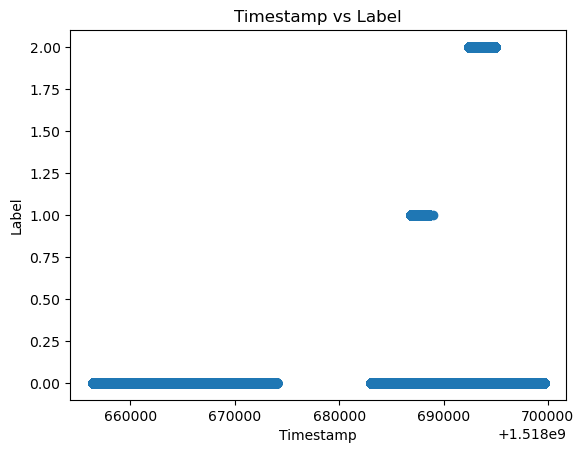

In [62]:
# create scatterplot graph with df_obj
import matplotlib.pyplot as plt

plt.scatter(df_obj['Timestamp'], df_obj['Label'])
plt.xlabel('Timestamp')
plt.ylabel('Label')
plt.title('Timestamp vs Label')
plt.show()

### 3.0 Data Modelling

In [63]:
# create a neural network using pytorch to predict the Label column with 3 categorical values: 0, 1, 2
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 3.2 NN with ReLu

In [64]:
print(df_selected.shape)
print(df_label.shape)

(1046154, 35)
(1046154,)


In [65]:
print(df_selected.isna().sum())
print(df_label.isna().sum())

print(np.isinf(df_selected).sum())
print(np.isinf(df_label).sum())


Protocol               0
Flow Duration          0
Bwd Pkt Len Max        0
Flow IAT Min           0
Fwd IAT Tot            0
Fwd IAT Max            0
Fwd IAT Min            0
Bwd IAT Max            0
Bwd IAT Min            0
Fwd PSH Flags          0
FIN Flag Cnt           0
SYN Flag Cnt           0
RST Flag Cnt           0
PSH Flag Cnt           0
ACK Flag Cnt           0
URG Flag Cnt           0
ECE Flag Cnt           0
Init Fwd Win Byts      0
Init Bwd Win Byts      0
Fwd Seg Size Min       0
Active Max             0
Idle Min               0
Fwd Pkt Len Std        0
Bwd Pkt Len Mean       0
Bwd Pkt Len Std        0
Flow IAT Mean          0
Flow IAT Std           0
Fwd IAT Mean           0
Bwd IAT Mean           0
Bwd IAT Std            0
Bwd Pkts/s             0
Bwd Seg Size Avg       0
Idle Mean              0
Flow Byts/s_z_score    0
Flow Pkts/s_z_score    0
dtype: int64
0
Protocol               0
Flow Duration          0
Bwd Pkt Len Max        0
Flow IAT Min           0
Fwd IAT To

In [96]:
# convert df_selected to a tensor
X = torch.tensor(df_selected.values, dtype=torch.float)

# convert df_label to a tensor
y = torch.tensor(df_label.values, dtype=torch.long)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# create a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 3)
        
        self.rrelu = nn.RReLU()  # Initialize RReLU activation

    def forward(self, x):
        x = self.rrelu(self.fc1(x))
        x = self.rrelu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = NeuralNetwork()

In [102]:
# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [103]:
# train the model
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# save the model
torch.save(model.state_dict(), 'simplenn_rrelu.pth')

Epoch 1/200, Loss: 1.0535638332366943
Epoch 11/200, Loss: 0.7294551730155945
Epoch 21/200, Loss: 0.40963464975357056
Epoch 31/200, Loss: 0.2450706511735916
Epoch 41/200, Loss: 0.22798876464366913
Epoch 51/200, Loss: 0.21778205037117004
Epoch 61/200, Loss: 0.20190423727035522
Epoch 71/200, Loss: 0.1915205717086792
Epoch 81/200, Loss: 0.18193548917770386
Epoch 91/200, Loss: 0.1712137758731842
Epoch 101/200, Loss: 0.1603759080171585
Epoch 111/200, Loss: 0.14924663305282593
Epoch 121/200, Loss: 0.138258159160614
Epoch 131/200, Loss: 0.12740591168403625
Epoch 141/200, Loss: 0.11717070639133453
Epoch 151/200, Loss: 0.10735942423343658
Epoch 161/200, Loss: 0.09775765240192413
Epoch 171/200, Loss: 0.08868317306041718
Epoch 181/200, Loss: 0.08021855354309082
Epoch 191/200, Loss: 0.07227005064487457


In [95]:
# make predictions
with torch.no_grad():
    output = model(X_test)
    _, predicted = torch.max(output, 1)

# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9831


#### NN with ReLU and skip connections

In [162]:
# convert df_selected to a tensor
X = torch.tensor(df_selected.values, dtype=torch.float)

# convert df_label to a tensor
y = torch.tensor(df_label.values, dtype=torch.long)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 3)
        
        self.relu = nn.ReLU()  # Initialize ReLU activation

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

model = NeuralNetwork()


In [164]:
# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [130]:
# train the model
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# save the model
torch.save(model.state_dict(), 'simplenn_relu.pth')

Epoch 1/500, Loss: 1.0591819286346436
Epoch 11/500, Loss: 0.8183314204216003
Epoch 21/500, Loss: 0.5048768520355225
Epoch 31/500, Loss: 0.27561458945274353
Epoch 41/500, Loss: 0.24299196898937225
Epoch 51/500, Loss: 0.23191186785697937
Epoch 61/500, Loss: 0.21292036771774292
Epoch 71/500, Loss: 0.20069833099842072
Epoch 81/500, Loss: 0.18929895758628845
Epoch 91/500, Loss: 0.17763282358646393
Epoch 101/500, Loss: 0.1648179143667221
Epoch 111/500, Loss: 0.15130703151226044
Epoch 121/500, Loss: 0.13773615658283234
Epoch 131/500, Loss: 0.12451235949993134
Epoch 141/500, Loss: 0.11125387996435165
Epoch 151/500, Loss: 0.09821992367506027
Epoch 161/500, Loss: 0.08662939816713333
Epoch 171/500, Loss: 0.07614585757255554
Epoch 181/500, Loss: 0.06649276614189148
Epoch 191/500, Loss: 0.05773266777396202
Epoch 201/500, Loss: 0.04971305653452873
Epoch 211/500, Loss: 0.042690541595220566
Epoch 221/500, Loss: 0.03591698035597801
Epoch 231/500, Loss: 0.03100798837840557
Epoch 241/500, Loss: 0.0269520

In [165]:
# make predictions
model.load_state_dict(torch.load('simplenn_relu.pth'))
with torch.no_grad():
    output = model(X_test)
    _, predicted = torch.max(output, 1)

# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9988


Testing model on other dataset.

In [3]:
import io
import boto3
from botocore.config import Config
from botocore import UNSIGNED


client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
cyber_bucket = 'cse-cic-ids2018'
cyber_prefix = f'Processed Traffic Data for ML Algorithms'
file_name = 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv'

obj = client.get_object(Bucket= cyber_bucket , Key = cyber_prefix + '/' + file_name)
df = pd.read_csv(io.BytesIO(obj['Body'].read()), encoding='utf8')
df.to_csv(file_name, index=False)

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/1262657896.py:13: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(obj['Body'].read()), encoding='utf8')


In [68]:
df = pd.read_csv(file_name)

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/707990406.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [69]:
file_name

'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv'

In [70]:
selected_features = ['Protocol', 'Bwd Pkt Len Max', 'Fwd IAT Tot', 'Fwd IAT Min',
       'Bwd IAT Max', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Idle Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd Seg Size Avg']

In [71]:
df.shape

(613104, 80)

In [72]:
df = df[df['Protocol'] != 'Protocol']

In [73]:
df.shape

(613071, 80)

In [74]:
df_selected_wed = df[selected_features]

In [75]:
df_selected_wed.shape

(613071, 20)

In [76]:
df_selected_wed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613071 entries, 0 to 613103
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Protocol           613071 non-null  object
 1   Bwd Pkt Len Max    613071 non-null  object
 2   Fwd IAT Tot        613071 non-null  object
 3   Fwd IAT Min        613071 non-null  object
 4   Bwd IAT Max        613071 non-null  object
 5   FIN Flag Cnt       613071 non-null  object
 6   SYN Flag Cnt       613071 non-null  object
 7   RST Flag Cnt       613071 non-null  object
 8   ACK Flag Cnt       613071 non-null  object
 9   URG Flag Cnt       613071 non-null  object
 10  Init Fwd Win Byts  613071 non-null  object
 11  Init Bwd Win Byts  613071 non-null  object
 12  Fwd Seg Size Min   613071 non-null  object
 13  Idle Min           613071 non-null  object
 14  Bwd Pkt Len Mean   613071 non-null  object
 15  Bwd Pkt Len Std    613071 non-null  object
 16  Fwd IAT Mean       613071

In [77]:
# show the unique values in the Protocol column
df_selected_wed['Protocol'].unique()

array([6, 0, 17, '6', '17', '0'], dtype=object)

In [78]:
df_selected_wed.head()

,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
0,6,1460,72880,363,24718,0,0,1,0,0,8192,7484,20,0,531.142857,673.118224,14576.0,12029.666667,13189.257518,531.142857
1,6,0,206,206,0,0,0,0,1,0,258,-1,20,0,0.0,0.0,206.0,0.0,0.0,0.0
2,6,0,165505,35,0,0,0,0,0,0,8192,8192,20,0,0.0,0.0,82752.5,0.0,0.0,0.0
3,6,1460,80271,366,30931,0,0,1,0,0,8192,7484,20,0,531.142857,673.118224,16054.2,13288.833333,14753.482727,531.142857
4,6,0,167,167,0,0,0,0,1,0,258,-1,20,0,0.0,0.0,167.0,0.0,0.0,0.0


In [79]:
# convert all columns to float
df_selected_wed = df_selected_wed.astype(float)

In [80]:
df_label_wed = df['Label']
df_label_wed.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [81]:
df_label_wed.shape


(613071,)

In [82]:
from sklearn.preprocessing import LabelEncoder

# Assume df_label_wed is your DataFrame and 'column_to_encode' is the name of the column you want to encode
le = LabelEncoder()
df_label_wed = le.fit_transform(df['Label'])

In [83]:
# show number of unique values for each column in df_selected_wed
df_selected_wed.nunique().sort_values(ascending=False)

Fwd IAT Mean         184583
Bwd IAT Std          164535
Bwd IAT Mean         154928
Fwd IAT Tot          145266
Bwd IAT Max           91182
Idle Min              51561
Fwd IAT Min           47048
Bwd Pkt Len Std       31836
Bwd Seg Size Avg      24488
Bwd Pkt Len Mean      24488
Init Fwd Win Byts      2793
Init Bwd Win Byts      2706
Bwd Pkt Len Max         894
Fwd Seg Size Min          9
Protocol                  3
URG Flag Cnt              2
ACK Flag Cnt              2
RST Flag Cnt              2
SYN Flag Cnt              2
FIN Flag Cnt              2
dtype: int64

In [84]:
# show missing values
df_selected_wed.isnull().sum().sort_values(ascending=False)

Protocol             0
Bwd Pkt Len Max      0
Bwd IAT Std          0
Bwd IAT Mean         0
Fwd IAT Mean         0
Bwd Pkt Len Std      0
Bwd Pkt Len Mean     0
Idle Min             0
Fwd Seg Size Min     0
Init Bwd Win Byts    0
Init Fwd Win Byts    0
URG Flag Cnt         0
ACK Flag Cnt         0
RST Flag Cnt         0
SYN Flag Cnt         0
FIN Flag Cnt         0
Bwd IAT Max          0
Fwd IAT Min          0
Fwd IAT Tot          0
Bwd Seg Size Avg     0
dtype: int64

In [85]:
# convert columns with two unique values to be boolean
for column in df_selected_wed.columns:
    if df_selected_wed[column].nunique() == 2:
        df_selected_wed[column] = df_selected_wed[column].astype(bool)


In [86]:
# convert protocol column to string type
df_selected_wed['Protocol'] = df_selected_wed['Protocol'].astype(str)

# convert protocol column to categorical encoding
df_selected_wed['Protocol'] = le.fit_transform(df_selected_wed['Protocol'])


In [87]:
df_selected_wed.describe()

,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
count,613071.000000,613071.000000,6.130710e+05,6.130710e+05,6.130710e+05,613071.000000,613071.000000,613071.000000,6.130710e+05,613071.000000,613071.000000,6.130710e+05,6.130710e+05,6.130710e+05,613071.000000
mean,1.611636,337.788499,1.192283e+07,6.009228e+05,3.507555e+06,4540.704444,6485.184388,16.014778,3.873722e+06,121.436951,118.399857,1.415025e+06,9.520714e+05,1.140929e+06,121.436951
std,0.522087,534.632062,3.276244e+07,5.503898e+06,1.171218e+07,10954.966734,18008.387368,6.902315,1.248554e+07,181.335007,221.329577,5.999491e+06,4.056272e+06,3.881971e+06,181.335007
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,8.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2.000000,69.000000,1.560000e+02,4.000000e+00,0.000000e+00,255.000000,-1.000000,20.000000,0.000000e+00,62.000000,0.000000,1.215000e+02,0.000000e+00,0.000000e+00,62.000000
75%,2.000000,219.000000,6.562470e+05,1.640000e+02,1.412740e+05,8192.000000,237.000000,20.000000,0.000000e+00,156.000000,62.753486,1.986482e+05,7.153950e+04,1.340602e+04,156.000000
max,2.000000,31469.000000,1.200000e+08,1.194554e+08,1.200000e+08,65535.000000,65535.000000,44.000000,1.194554e+08,1693.629344,1329.360749,1.194554e+08,1.181634e+08,8.304895e+07,1693.629344


In [88]:
# do min-max normalization on columns in df_selected_wed that have std < 1e2. Do not include the 'Protocol' column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df_selected_wed.columns[(df_selected_wed.std() < 1e2) & (df_selected_wed.columns != 'Protocol')]
df_selected_wed[cols] = scaler.fit_transform(df_selected_wed[cols])


In [89]:
# do min-max normalization  on columns in df_selected_wed that have std > 1e2

cols = df_selected_wed.columns[(df_selected_wed.std() > 1e2) & (df_selected_wed.columns != 'Protocol')]
df_selected_wed[cols] = scaler.fit_transform(df_selected_wed[cols])

df_selected_wed.describe()

,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
count,613071.000000,613071.000000,613071.000000,6.130710e+05,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000,613071.000000
mean,1.611636,0.010734,0.099357,5.030521e-03,0.029230,0.006206,0.064570,0.227137,0.237656,0.050926,0.069301,0.098971,0.363972,0.032428,0.071702,0.089065,0.011846,0.008057,0.013738,0.071702
std,0.522087,0.016989,0.273020,4.607493e-02,0.097602,0.078536,0.245766,0.418982,0.425648,0.219846,0.167160,0.274786,0.156871,0.104521,0.107069,0.166493,0.050224,0.034328,0.046743,0.107069
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.002193,0.000001,3.348530e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003906,0.000000,0.454545,0.000000,0.036608,0.000000,0.000001,0.000000,0.000000,0.036608
75%,2.000000,0.006959,0.005469,1.372897e-06,0.001177,0.000000,0.000000,0.000000,0.000000,0.000000,0.125015,0.003632,0.454545,0.000000,0.092110,0.047206,0.001663,0.000605,0.000161,0.092110
max,2.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df_label_wed

array([0, 0, 0, ..., 0, 1, 1])

In [90]:
from sklearn.model_selection import train_test_split

# convert df_selected_wed to a tensor
X = torch.tensor(df_selected_wed.values, dtype=torch.float)

# convert df_label_wed to a tensor
y = torch.tensor(df_label_wed, dtype=torch.long)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# how to use simplenn_relu.pth to validate on test set
from torch.autograd import Variable
import torch
from sklearn.metrics import accuracy_score
import torch.nn as nn

model = NeuralNetwork()  # Assuming you have defined the NeuralNetwork class

# Load the model weights
model.load_state_dict(torch.load('simplenn_relu.pth'))

with torch.no_grad():
    output = model(X_test)
    _, predicted = torch.max(output, 1)

# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8884


Run model on trained dataset but using different normalization techniques.

In [92]:
df = pd.read_parquet('Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet')

In [93]:
df_selected_thurs = df[selected_features]

In [94]:
df_selected_thurs.shape

(1048575, 20)

In [95]:
df_label_thurs = df['Label']
df_label_thurs.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [200]:
# convert df_label_wed to categorical encoding via scikit


In [96]:
from sklearn.preprocessing import LabelEncoder

# Assume df_label_wed is your DataFrame and 'column_to_encode' is the name of the column you want to encode
le = LabelEncoder()
df_label_thurs = le.fit_transform(df['Label'])

In [97]:
df_selected_thurs.describe()

,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,9.518465e+00,3.305074e+02,1.382441e+07,2.796781e+06,3.671905e+06,5.867010e-03,5.123811e-02,6.098658e-02,2.856267e-01,4.781155e-02,5.221909e+03,5.600345e+03,1.659039e+01,4.109270e+06,1.205176e+02,1.204887e+02,3.621013e+06,1.419460e+06,1.183067e+06,1.205176e+02
std,5.303721e+00,4.938690e+02,3.327526e+07,1.256292e+07,1.279009e+07,7.637142e-02,2.204831e-01,2.393058e-01,4.517126e-01,2.133674e-01,1.053626e+04,1.712450e+04,7.476644e+00,1.398498e+07,1.850138e+02,2.068673e+02,1.264398e+07,7.289544e+06,4.135576e+06,1.850138e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,9.000000e+01,7.450000e+02,3.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.570000e+02,-1.000000e+00,2.000000e+01,0.000000e+00,6.600000e+01,0.000000e+00,4.340000e+02,0.000000e+00,0.000000e+00,6.600000e+01
75%,1.700000e+01,4.090000e+02,2.100640e+06,3.100000e+02,2.496445e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.192000e+03,2.190000e+02,2.000000e+01,0.000000e+00,1.470000e+02,1.670353e+02,3.883558e+05,1.866204e+05,2.484309e+04,1.470000e+02
max,1.700000e+01,2.708000e+03,1.199999e+08,1.199915e+08,1.199131e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.553500e+04,6.553500e+04,5.600000e+01,1.199915e+08,1.457941e+03,1.329361e+03,1.199915e+08,1.199131e+08,8.450252e+07,1.457941e+03


In [98]:
# show missing values
df_selected_thurs.isnull().sum().sort_values(ascending=False)

Protocol             0
Bwd Pkt Len Max      0
Bwd IAT Std          0
Bwd IAT Mean         0
Fwd IAT Mean         0
Bwd Pkt Len Std      0
Bwd Pkt Len Mean     0
Idle Min             0
Fwd Seg Size Min     0
Init Bwd Win Byts    0
Init Fwd Win Byts    0
URG Flag Cnt         0
ACK Flag Cnt         0
RST Flag Cnt         0
SYN Flag Cnt         0
FIN Flag Cnt         0
Bwd IAT Max          0
Fwd IAT Min          0
Fwd IAT Tot          0
Bwd Seg Size Avg     0
dtype: int64

In [99]:
# show unique values
df_selected_thurs.nunique().sort_values(ascending=False)

Fwd IAT Mean         444703
Fwd IAT Tot          434593
Bwd IAT Mean         335604
Bwd IAT Std          325005
Bwd IAT Max          262596
Fwd IAT Min          148883
Idle Min             134473
Bwd Pkt Len Std       46792
Bwd Pkt Len Mean      38049
Bwd Seg Size Avg      38048
Init Bwd Win Byts      5123
Init Fwd Win Byts      4493
Bwd Pkt Len Max        1172
Fwd Seg Size Min         11
Protocol                  3
URG Flag Cnt              2
ACK Flag Cnt              2
RST Flag Cnt              2
SYN Flag Cnt              2
FIN Flag Cnt              2
dtype: int64

In [183]:
# return unique values in numpy array called df_label_thurs
np.unique(df_label_thurs)

array([0, 1, 2])

In [100]:
# convert columns with two unique values to be boolean
for column in df_selected_thurs.columns:
    if df_selected_thurs[column].nunique() == 2:
        df_selected_thurs[column] = df_selected_thurs[column].astype(bool)

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/4058061830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_thurs[column] = df_selected_thurs[column].astype(bool)
/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/4058061830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_thurs[column] = df_selected_thurs[column].astype(bool)
/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/4058061830.py:4: SettingWithCopyWarning: 
A value is trying 

In [101]:
# convert Protocol column to categorical encoding
df_selected_thurs['Protocol'] = le.fit_transform(df_selected_thurs['Protocol'])

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/1783961882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_thurs['Protocol'] = le.fit_transform(df_selected_thurs['Protocol'])


In [102]:
# describe the dataframe
df_selected_thurs.describe()

,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.311813e+00,3.305074e+02,1.382441e+07,2.796781e+06,3.671905e+06,5.221909e+03,5.600345e+03,1.659039e+01,4.109270e+06,1.205176e+02,1.204887e+02,3.621013e+06,1.419460e+06,1.183067e+06,1.205176e+02
std,4.999957e-01,4.938690e+02,3.327526e+07,1.256292e+07,1.279009e+07,1.053626e+04,1.712450e+04,7.476644e+00,1.398498e+07,1.850138e+02,2.068673e+02,1.264398e+07,7.289544e+06,4.135576e+06,1.850138e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,9.000000e+01,7.450000e+02,3.400000e+01,0.000000e+00,2.570000e+02,-1.000000e+00,2.000000e+01,0.000000e+00,6.600000e+01,0.000000e+00,4.340000e+02,0.000000e+00,0.000000e+00,6.600000e+01
75%,2.000000e+00,4.090000e+02,2.100640e+06,3.100000e+02,2.496445e+05,8.192000e+03,2.190000e+02,2.000000e+01,0.000000e+00,1.470000e+02,1.670353e+02,3.883558e+05,1.866204e+05,2.484309e+04,1.470000e+02
max,2.000000e+00,2.708000e+03,1.199999e+08,1.199915e+08,1.199131e+08,6.553500e+04,6.553500e+04,5.600000e+01,1.199915e+08,1.457941e+03,1.329361e+03,1.199915e+08,1.199131e+08,8.450252e+07,1.457941e+03


In [103]:
# do min-max normalization on columns in df_selected_thurs. Do not include the 'Protocol' column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df_selected_thurs.columns[(df_selected_thurs.columns != 'Protocol')]

df_selected_thurs[cols] = scaler.fit_transform(df_selected_thurs[cols])

df_selected_thurs.describe()

/var/folders/j_/41mkgtyn6bq9v553s18qvv180000gn/T/ipykernel_2462/1852472063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_thurs[cols] = scaler.fit_transform(df_selected_thurs[cols])


,Protocol,Bwd Pkt Len Max,Fwd IAT Tot,Fwd IAT Min,Bwd IAT Max,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Fwd IAT Mean,Bwd IAT Mean,Bwd IAT Std,Bwd Seg Size Avg
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.311813e+00,1.220485e-01,1.152036e-01,2.330816e-02,3.062139e-02,5.867010e-03,5.123811e-02,6.098658e-02,2.856267e-01,4.781155e-02,7.969527e-02,8.546974e-02,2.962570e-01,3.424633e-02,8.266287e-02,9.063656e-02,3.017724e-02,1.183741e-02,1.400038e-02,8.266287e-02
std,4.999957e-01,1.823741e-01,2.772940e-01,1.046984e-01,1.066614e-01,7.637142e-02,2.204831e-01,2.393058e-01,4.517126e-01,2.133674e-01,1.607706e-01,2.612992e-01,1.335115e-01,1.165498e-01,1.269007e-01,1.556142e-01,1.053739e-01,6.079023e-02,4.894027e-02,1.269007e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.428571e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,3.323486e-02,6.208339e-06,2.833533e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.936768e-03,0.000000e+00,3.571429e-01,0.000000e+00,4.526931e-02,0.000000e+00,3.616922e-06,0.000000e+00,0.000000e+00,4.526931e-02
75%,2.000000e+00,1.510340e-01,1.750535e-02,2.583516e-06,2.081879e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.250153e-01,3.356934e-03,3.571429e-01,0.000000e+00,1.008271e-01,1.256509e-01,3.236527e-03,1.556297e-03,2.939923e-04,1.008271e-01
max,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [104]:
# convert df_selected_wed to a tensor
X = torch.tensor(df_selected_thurs.astype(float).values, dtype=torch.float)

# convert df_label_wed to a tensor
y = torch.tensor(df_label_thurs, dtype=torch.long)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# how to use simplenn_relu.pth to validate on test set
from torch.autograd import Variable
model = NeuralNetwork()  # Assuming you have defined the NeuralNetwork class

# Load the model weights
model.load_state_dict(torch.load('simplenn_relu.pth'))

with torch.no_grad():
    output = model(X_test)
    _, predicted = torch.max(output, 1)

# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9989


### 4.0 Archived cells

Check correlation between df_int and df_float.

In [ ]:
# append df_int and df_float
df_num = pd.concat([df_int, df_float])

# create graphical correlation matrix for df_num
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr().abs(), annot=True, fmt='.2f', cmap='coolwarm')


In [ ]:
# show heatmap of correlations above 0.9
plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr().abs()[df_num.corr() > 0.9], annot=True, fmt='.2f', cmap='coolwarm')


In [ ]:
# list the pairs of columns with correlation above 0.9 and their correlation values. Do not include 1.0 correlations
correlation_matrix = df_num.corr().abs()
correlation_matrix = correlation_matrix[correlation_matrix > 0.9]
correlation_matrix = correlation_matrix[correlation_matrix < 1.0]
correlation_matrix.dropna(axis=0, how='all', inplace=True)
correlation_matrix.dropna(axis=1, how='all', inplace=True)
correlation_matrix = correlation_matrix.stack().reset_index()


In [ ]:
correlation_matrix.sort_values(by=0, ascending=False)

In [ ]:
# list the unique column pairs. Such that if (A, B) is listed, (B, A) should not be listed
correlation_matrix['pairs'] = correlation_matrix[['level_0', 'level_1']].apply(frozenset, axis=1)
correlation_matrix.drop_duplicates(subset='pairs', inplace=True)
correlation_matrix.drop(columns='pairs', inplace=True)
correlation_matrix.sort_values(by=0, ascending=False)

In [ ]:
# show correlation between Tot Bwd Pkts and Subflow Bwd Pkts
df[['Tot Bwd Pkts', 'Subflow Bwd Pkts']].corr()

In [ ]:
# drop columns 'Tot Bwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Pkts', 

In [ ]:
# list columns in level_0 that appear more than once
value_counts = correlation_matrix['level_0'].value_counts()

# Sort the value counts in descending order
sorted_value_counts = value_counts.sort_values(ascending=False)

# Filter to show only those values greater than 1
filtered_value_counts = sorted_value_counts[sorted_value_counts > 1]
filtered_value_counts


In [ ]:
# list columns in level_1 that appear more than once
value_counts = correlation_matrix['level_1'].value_counts()

# Sort the value counts in descending order
sorted_value_counts = value_counts.sort_values(ascending=False)

# Filter to show only those values greater than 1
filtered_value_counts = sorted_value_counts[sorted_value_counts > 1]
filtered_value_counts


In [ ]:
# list columns that overlap in level_0 and level_1
level_0 = correlation_matrix['level_0'].value_counts()
level_1 = correlation_matrix['level_1'].value_counts()

overlap = level_0[level_0.index.isin(level_1.index)]
overlap

In [ ]:
# show the unique columns in the correlation matrix
correlation_matrix['level_0'].unique()

In [ ]:
correlation_matrix['level_0'].unique().shape[0]

In [ ]:
# show columns with either "Min", "Max" in their names
min = df_num.filter(like='Min').columns
min

In [ ]:
max = df_num.filter(like='Max').columns
max

In [ ]:
avg = df_num.filter(like='Avg').columns
avg

In [ ]:
mean = df_num.filter(like='Mean').columns
mean

In [ ]:
std = df_num.filter(like='Std').columns
std

In [ ]:
# sort the min, max, and mean columns alphabetically
min = min.sort_values()
max = max.sort_values()
mean = mean.sort_values()

# convert 'min', 'max', and 'mean' to Series objects
min = pd.Series(min)
max = pd.Series(max)
mean = pd.Series(mean)

# show the sorted columns side by side
pd.concat([min, max, mean], axis=1)

In [ ]:
# sort the std columns alphabetically
std = std.sort_values()

# convert 'std' to a Series object
std = pd.Series(std)

# show std and mean columns side by side
pd.concat([std, mean], axis=1)

In [ ]:
# store the column values in std and mean columns
std = df_num.filter(like='Std')
mean = df_num.filter(like='Mean')


In [ ]:
std.head()

In [ ]:
# create a dataframe of the std and mean columns
df_std_mean = df_num[std]
df_std_mean = df_std_mean.join(df_num[mean])

df_std_mean.head()

In [ ]:
# show number of null values in the std and mean columns
df_std_mean.isnull().sum().sort_values(ascending=False)